In [1]:
from deepface import DeepFace
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path
home = str(Path.home())
print("HOME_FOLDER is ",home)
print("weight saved at ",home + "\.deepface\weights")

def drawBBoxs(base_img, bboxs):
    output_img = base_img.copy()
    output_img = output_img[:, :, ::-1]

    output_img = Image.fromarray(np.uint8(output_img)).convert('RGB')
    draw = ImageDraw.Draw(output_img)

    for bbox in bboxs:
        x0 = bbox[0]
        x1 = bbox[0] + bbox[2]
        y0 = bbox[1]
        y1 = bbox[1] + bbox[3]
        draw.rectangle((x0, y0, x1, y1), outline="blue", width=5)
        draw.text((x0 + 10, y0 + 10), str(round(bbox[4],2)), fill="red")

        output_img = np.array(output_img)
        output_img = output_img[:, :, ::-1]
        return output_img

HOME_FOLDER is  C:\Users\holeo
weight saved at  C:\Users\holeo\.deepface\weights


In [ ]:
# Face recognition
df = DeepFace.find(img_path = "dataset/img70.jpg", db_path = "db", enforce_detection=False)
print(df.head())

Finding representations:   0%|                                                                 | 0/786 [00:00<?, ?it/s]

Finding representations:  40%|█████████████████████▊                                 | 311/786 [04:42<15:05,  1.91s/it]

In [ ]:
# Face recognition
df = DeepFace.find(img_path = "dataset/img71.jpg", db_path = "db")
print(df.head())

In [23]:
# Video Analysis

from deepface.commons.functions import initialize_detector, load_image, detect_face2
import numpy as np
import cv2
from PIL import Image, ImageDraw
current_frame = 1
video_path = 'dataset/demo2.mp4'
# detector_backend = 'ssd'
detector_backend = 'mtcnn'
grayscale = False
enforce_detection = False
return_region = False
db_folder = "db"

initialize_detector(detector_backend = detector_backend)

cap = cv2.VideoCapture(video_path)

if (cap.isOpened()== False):
    print("Error opening video stream or file")

ret, frame = cap.read()
frame_width = frame.shape[1]
frame_height = frame.shape[0]
out = cv2.VideoWriter('output.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 30, (frame_width,frame_height))
out.write(frame)
# Read until video is completed
while(cap.isOpened()):
    current_frame += 1
    if current_frame % 10 == 0:
        print(current_frame, end = ", ")
  # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
        img = load_image(frame)
        
        
        if detector_backend == 'ssd':
            original_size = img.shape
            target_size = (300, 300)
            aspect_ratio_x = (original_size[1] / target_size[1])
            aspect_ratio_y = (original_size[0] / target_size[0])
            base_img = img.copy()
            df = detect_face2(img = img, detector_backend = detector_backend, grayscale = grayscale, enforce_detection = enforce_detection)

            if df.shape[0] == 0: #No Face Detected
                out.write(img)

            else:

                df.sort_values('left', inplace=True)

                bboxs = []
                for index, instance in df.iterrows():
                    left = instance["left"]
                    right = instance["right"]
                    bottom = instance["bottom"]
                    top = instance["top"]
                    detected_face = base_img[int(top*aspect_ratio_y):int(bottom*aspect_ratio_y), int(left*aspect_ratio_x):int(right*aspect_ratio_x)]
                    bboxs.append([int(left*aspect_ratio_x), int(top*aspect_ratio_y), int(right*aspect_ratio_x) - int(left*aspect_ratio_x), int(bottom*aspect_ratio_y) - int(top*aspect_ratio_y), instance['confidence']])

                output_img = drawBBoxs(base_img, bboxs)
                out.write(output_img)
        if detector_backend == 'mtcnn':
            base_img = img.copy()
            detections = detect_face2(img = img, detector_backend = detector_backend, grayscale = grayscale, enforce_detection = enforce_detection)
            if len(detections) == 0:
                out.write(img)
            else:
                bboxs = []
                face_count = 0
                for detection in detections:
                    x, y, w, h = detection["box"]
                    bboxs.append([x, y, w, h, detection['confidence']])
#                     try:
#                         detected_face = base_img[int(y):int(y+h), int(x):int(x+w)]
#                         detected_face = detected_face[:, :, ::-1]
#                         new_im = Image.fromarray(detected_face)
#                         new_im.save(db_folder + "/new/" + str(current_frame) + "_" + str(face_count) + ".jpg")
#                     except:
#                         pass
                    face_count += 1
                    
                output_img = drawBBoxs(base_img, bboxs)
                out.write(output_img)
  # Break the loop
    else: 
        break
    
# When everything done, release the video capture object
cap.release()
out.release()

cv2.destroyAllWindows()


10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230, 1240, 

In [11]:
from deepface.commons.functions import initialize_detector, preprocess_face, load_image, detect_face2
from PIL import Image, ImageDraw

detector_backend = 'mtcnn'
img_path = "dataset/img69.jpg"
grayscale = False
enforce_detection = False
return_region = False
initialize_detector(detector_backend)

img = load_image(img_path)
original_size = img.shape
detections = detect_face2(img = img, detector_backend = detector_backend, grayscale = grayscale, enforce_detection = enforce_detection)
print(detections)

[{'box': [335, 132, 61, 82], 'confidence': 0.9999924898147583, 'keypoints': {'left_eye': (346, 165), 'right_eye': (373, 170), 'nose': (352, 187), 'mouth_left': (345, 191), 'mouth_right': (374, 195)}}, {'box': [177, 128, 63, 85], 'confidence': 0.999990701675415, 'keypoints': {'left_eye': (199, 161), 'right_eye': (228, 159), 'nose': (218, 178), 'mouth_left': (197, 187), 'mouth_right': (228, 185)}}, {'box': [270, 124, 61, 83], 'confidence': 0.9999877214431763, 'keypoints': {'left_eye': (293, 156), 'right_eye': (320, 163), 'nose': (306, 177), 'mouth_left': (286, 180), 'mouth_right': (314, 188)}}, {'box': [405, 150, 64, 83], 'confidence': 0.9999837875366211, 'keypoints': {'left_eye': (420, 182), 'right_eye': (448, 183), 'nose': (429, 200), 'mouth_left': (418, 208), 'mouth_right': (450, 210)}}, {'box': [479, 143, 60, 80], 'confidence': 0.9999462366104126, 'keypoints': {'left_eye': (488, 177), 'right_eye': (513, 174), 'nose': (495, 193), 'mouth_left': (492, 202), 'mouth_right': (520, 199)}}]


Original Image


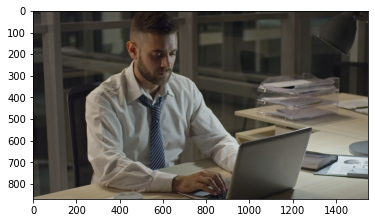

   img_id  is_face  confidence  left  top  right  bottom
0     0.0      1.0    0.958772    95   31    127     112


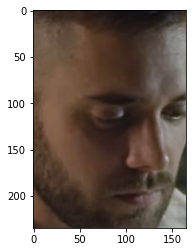

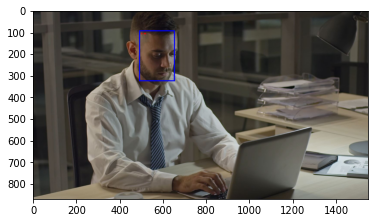

In [15]:
from deepface.commons.functions import initialize_detector, preprocess_face, load_image, detect_face2
from PIL import Image, ImageDraw

detector_backend = 'ssd'
img_path = "dataset/img68.jpg"
target_size=(224, 224)
grayscale = False
enforce_detection = False
return_region = False

initialize_detector(detector_backend)

# detect_face ssd
img = load_image(img_path)
original_size = img.shape
target_size = (300, 300)
aspect_ratio_x = (original_size[1] / target_size[1])
aspect_ratio_y = (original_size[0] / target_size[0])

#Display original image
img2 = img[:, :, ::-1] #bgr to rgb
print("Original Image")
plt.imshow(img2)
plt.show()

base_img = img.copy()
df = detect_face2(img = img, detector_backend = detector_backend, grayscale = grayscale, enforce_detection = enforce_detection)
df.sort_values('left', inplace=True)
print(df)

bboxs = []

for index, instance in df.iterrows():
    left = instance["left"]
    right = instance["right"]
    bottom = instance["bottom"]
    top = instance["top"]
    detected_face = base_img[int(top*aspect_ratio_y):int(bottom*aspect_ratio_y), int(left*aspect_ratio_x):int(right*aspect_ratio_x)]
    bboxs.append([int(left*aspect_ratio_x), int(top*aspect_ratio_y), int(right*aspect_ratio_x) - int(left*aspect_ratio_x), int(bottom*aspect_ratio_y) - int(top*aspect_ratio_y), instance['confidence']])
    
    img2 = detected_face[:, :, ::-1]
    plt.imshow(img2)
    plt.show()
    
output_img = base_img.copy()
output_img = output_img[:, :, ::-1]

output_img = Image.fromarray(np.uint8(output_img)).convert('RGB')
draw = ImageDraw.Draw(output_img)

for bbox in bboxs:
    x0 = bbox[0]
    x1 = bbox[0] + bbox[2]
    y0 = bbox[1]
    y1 = bbox[1] + bbox[3]
    draw.rectangle((x0, y0, x1, y1), outline="blue", width=5)
    draw.text((x0 + 10, y0 + 10), str(round(bbox[4],2)), fill="red")


plt.imshow(output_img)
plt.show()

In [ ]:
print(type(output_img))

In [ ]:
result  = DeepFace.verify("dataset/img1.jpg", "dataset/img2.jpg")
print(result)
print("Is verified: ", result["verified"])

In [ ]:
models = ["VGG-Face", "Facenet", "OpenFace", "DeepFace", "DeepID", "ArcFace"
#           , "Dlib"
         ]
for model in models:
    result = DeepFace.verify("dataset/img1.jpg", "dataset/img2.jpg", model_name = model)
    print(model)
    print(result)
    print()

In [4]:
# Face recognition
df = DeepFace.find(img_path = "dataset/img68.jpg", db_path = "db")
print(df.head())

Analyzing:   0%|                                                                                 | 0/1 [00:00<?, ?it/s]

There are  1  representations found in  representations_vgg_face.pkl


Analyzing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.23s/it]

find function lasts  4.877528190612793  seconds
         identity  VGG-Face_cosine
0  db\Bob/Bob.jpg         0.029948


In [ ]:
# Face Detectors
backends = ['opencv', 'ssd'
#             , 'dlib'
            , 'mtcnn']
for backend in backends:
   #face detection and alignment
    detected_face = DeepFace.detectFace("dataset/img61.jpg", detector_backend = backend)
    print(backend)
    plt.imshow(detected_face)
    plt.show()

In [ ]:
# DeepFace.stream(db_path = "db", model_name ='VGG-Face', distance_metric = 'cosine', enable_face_analysis = False, source = 'test.mkv', time_threshold = 5, frame_threshold = 5)